In [14]:
# WORKING WITH DATE AND TIME

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
divorce = pd.read_csv('Data/divorce.csv')
divorce.head(5)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [5]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [10]:
divorce['divorce_date'] = pd.to_datetime(divorce['divorce_date'])
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
divorce['dob_man'] = pd.to_datetime(divorce['dob_man'])
divorce['dob_woman'] = pd.to_datetime(divorce['dob_woman'])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [12]:
# To extract a single date component, use 'dt'
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce.head(2)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001


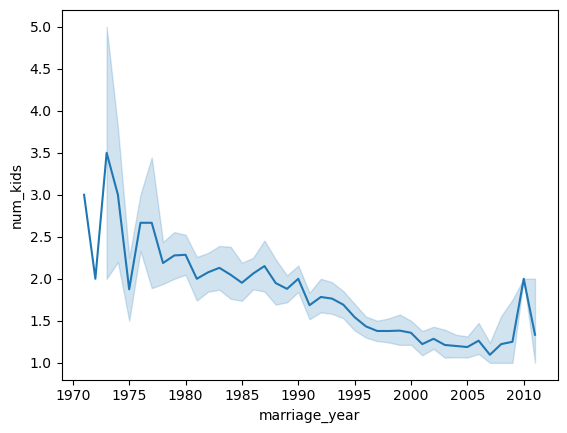

In [15]:
sns.lineplot(divorce, x='marriage_year', y='num_kids')
plt.show()

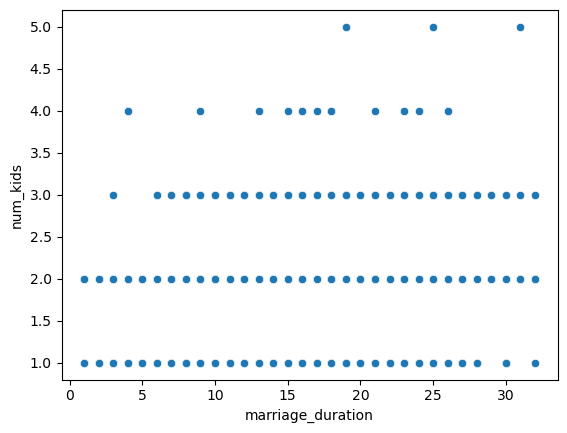

In [18]:
# CORRELATION
sns.scatterplot(divorce, x='marriage_duration', y='num_kids')
plt.show()

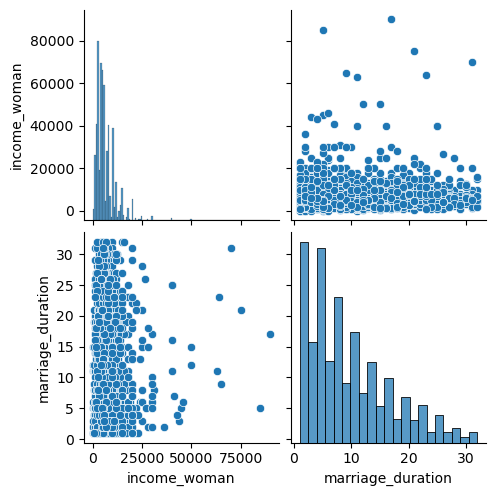

In [19]:
sns.pairplot(divorce, vars=['income_woman','marriage_duration'])
plt.show()

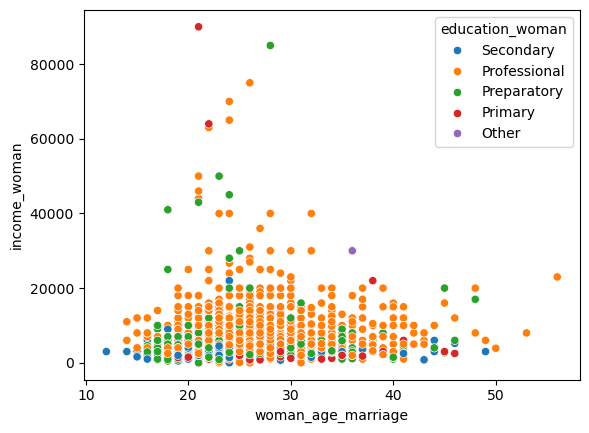

In [29]:
# Categorical variables are usually visually described
# using counts, histograms, etc. 

divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year
sns.scatterplot(divorce, x='woman_age_marriage', y='income_woman',hue='education_woman')
plt.show()

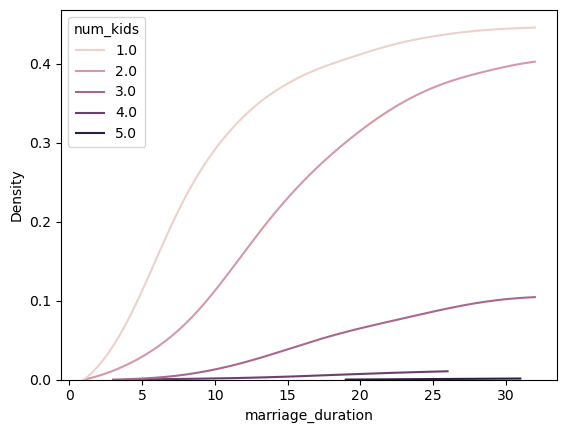

In [35]:
sns.kdeplot(divorce, x='marriage_duration', hue='num_kids', cut=0, cumulative=True)
plt.show()

In [78]:
# CLASS FREQUENCIES

planes = pd.read_csv('Data/planes.csv')
planes.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0


In [45]:
planes.groupby(['Source','Destination'])['Price'].apply(lambda x : round(x.median(), 2))

Source    Destination
Banglore  Delhi           4823.0
          New Delhi      10976.5
Chennai   Kolkata         3850.0
Delhi     Cochin         10262.0
Kolkata   Banglore        9345.0
Mumbai    Hyderabad       3342.0
Name: Price, dtype: float64

In [46]:
salaries = pd.read_csv('Data/ds_salaries_clean.csv')
salaries.head(2)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0


In [50]:
pd.crosstab(salaries['Company_Size'], salaries['Experience'])
# You can specify the values to be tabulated ('value=' parameter) and
# the aggregation function to be used ('aggfunc=')

Experience,Entry,Executive,Mid,Senior
Company_Size,,,,
L,29,11,86,72
M,30,12,98,186
S,29,3,29,22


In [70]:
# GENERATING NEW FEATURES

# Notice that Total_Stops should be represented as an integer instead?
planes.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0


In [69]:
planes.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [79]:
planes['Total_Stops'].value_counts()

Total_Stops
1 stop      5503
non-stop    3411
2 stops     1488
3 stops       45
4 stops        1
Name: count, dtype: int64

In [82]:
# We can clean it to convert it to an integer data type

planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop','0')

'''
    We could do:
    planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops','')
    planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')

    but it's not robust. If we reverse the order, we will get incorrect output (e.g.: 1s, 2s,..)
    Hence we use regex.
'''

planes['Total_Stops'] = planes['Total_Stops'].str.replace(r' stops?','',regex=True)  # '?' indicates that the last 's' is optional
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

planes['Total_Stops'].value_counts()

ValueError: cannot convert float NaN to integer

In [85]:
planes[planes['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
67,IndiGo,12/03/2019,Chennai,Kolkata,MAA → CCU,13:20,15:35,2h 15m,NaN,No info,6297.0
136,Jet Airways,24/05/2019,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,NaN,In-flight meal not included,4030.0
182,IndiGo,12/05/2019,Chennai,Kolkata,MAA → CCU,14:45,17:05,2h 20m,NaN,No info,NaN
205,Vistara,27/06/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,NaN,No info,4878.0
274,Air India,27/03/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,NaN,No info,2575.0
...,...,...,...,...,...,...,...,...,...,...,...
10409,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,09:35,12:30,2h 55m,NaN,No info,NaN
10465,SpiceJet,12/05/2019,Banglore,Delhi,BLR → DEL,09:30,12:20,NaN,NaN,No info,4423.0
10534,Jet Airways,12/06/2019,Banglore,Delhi,BLR → DEL,11:10,14:05,2h 55m,NaN,In-flight meal not included,5769.0
10592,Jet Airways,1/04/2019,Banglore,Delhi,BLR → DEL,15:15,18:10,NaN,NaN,No info,NaN


In [86]:
planes['Total_Stops'] = planes['Total_Stops'].fillna('0')

In [88]:
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

In [90]:
planes['Total_Stops'].value_counts()

Total_Stops
1    5503
0    3623
2    1488
3      45
4       1
Name: count, dtype: int64

In [97]:
planes['Duration_Delta'] = pd.to_timedelta(planes['Duration'])

In [99]:
planes['Duration_Delta']

0       0 days 19:00:00
1       0 days 05:25:00
2       0 days 04:45:00
3       0 days 02:25:00
4       0 days 15:30:00
              ...      
10655   0 days 02:30:00
10656   0 days 02:35:00
10657   0 days 03:00:00
10658   0 days 02:40:00
10659   0 days 08:20:00
Name: Duration_Delta, Length: 10660, dtype: timedelta64[ns]

In [103]:
planes['Duration_Hour'] = planes['Duration_Delta'].dt.components['hours']
planes['Duration_Minutes'] = planes['Duration_Delta'].dt.components['minutes']

In [108]:
planes[['Duration_Hour','Duration_Minutes','Duration', 'Duration_Delta']]

,Duration_Hour,Duration_Minutes,Duration,Duration_Delta
0,19.0,0.0,19h,0 days 19:00:00
1,5.0,25.0,5h 25m,0 days 05:25:00
2,4.0,45.0,4h 45m,0 days 04:45:00
3,2.0,25.0,2h 25m,0 days 02:25:00
4,15.0,30.0,15h 30m,0 days 15:30:00
...,...,...,...,...
10655,2.0,30.0,2h 30m,0 days 02:30:00
10656,2.0,35.0,2h 35m,0 days 02:35:00
10657,3.0,0.0,3h,0 days 03:00:00
10658,2.0,40.0,2h 40m,0 days 02:40:00


In [ ]:
# Generating a new feature called 'Price Category'

planes['Price'].describe()

# From these quick statistics, we can bin prices into their own category 
# using the percentiles

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

In [112]:
pct25 = planes['Price'].quantile(0.25)
median = planes['Price'].median()
pct75 = planes['Price'].quantile(0.75)
max = planes['Price'].max()

# Define the category labels
ticket_cat = ['Economy','Premium Economy','Business Class','First Class']
# Define the bins where each price falls in.
# We use 0 as the minimum bin
price_bins = [0, pct25, median, pct75, max]

# Call 'pd.cut()' which bins values according to a set category
planes['Ticket Category'] = pd.cut(planes['Price'], bins=price_bins, labels=ticket_cat)

In [113]:
planes[['Price','Ticket Category']]

,Price,Ticket Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class
...,...,...
10655,4107.0,Economy
10656,4145.0,Economy
10657,7229.0,Premium Economy
10658,12648.0,First Class
